Let's make a cute animation showing how the interface bands come together at the Weyl node as tunnelling is increased. First, we import the required modules:

In [6]:
# the basics
from matplotlib.animation import FuncAnimation
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import seaborn as sns
# sns.set_style("white")

# our very own
%load_ext autoreload
%autoreload 2
import floquet as flo

MovieWriter ffmpeg unavailable; using Pillow instead.


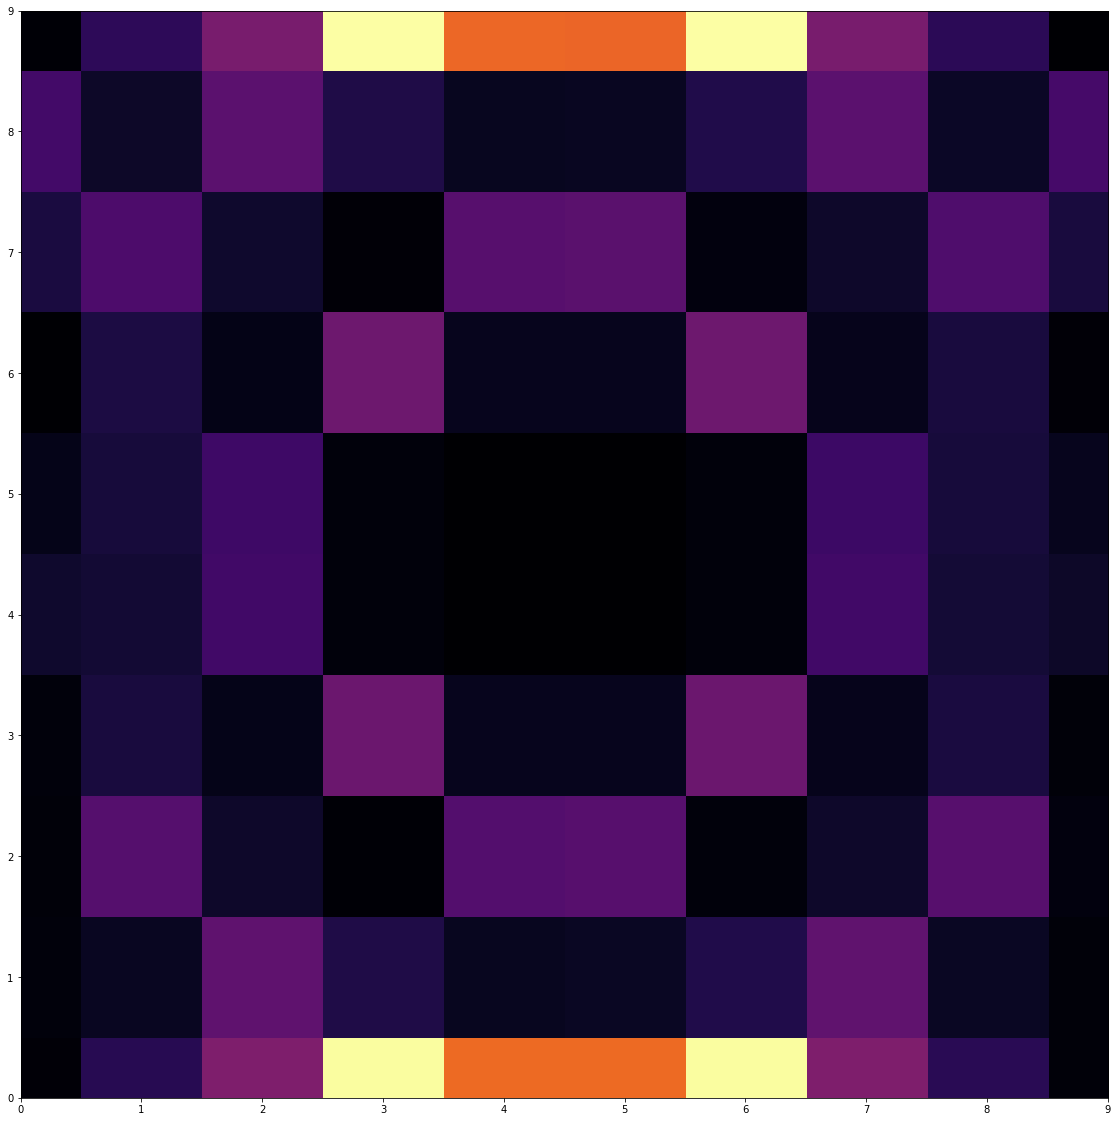

In [9]:
# set the parameters we'll be using
# define all variables
# hbar is a global variable
hbar = 0.6582119569 # ev * fs

# these are parameters
v = 3.6/hbar # Ang/fs
Omega = 0.12/hbar # fs^-1
Tpump = 106.16 # fs
Tprobe = 26 # fs
eE0 = 7.5e-3 # eV / Ang
mu = 0.3 # eV
wf = mu/hbar # fs^-1

t0 = 0

k_up = 0.1
k_down = -0.1
wp_up = np.pi
wp_down = -np.pi

res_e = 100
res = 100

E0s = np.linspace(0,0.01,num=res_e)

def Photocurrent(efield):
    P = flo.PhotocurrentArrayWKCircular(k_dir=1,k_other=0,k_bounds=[k_down,k_up],wp_bounds=[wp_down,wp_up],
                                    t0=t0,v=v,mu=mu,eE0=efield,Omega=Omega,Tpump=Tpump,Tprobe=Tprobe)
    return P

# tool to help plot labels in the right places
def coord_to_res(x,x_up,x_low,res):
    """
    translates physical value (kx = 0) to pixel (res/2)
    linear scaling compatible only
    """
    m = (res-1)/(x_up-x_low)
    b = -m * x_low
    return m*x+b

def update(i):
    ax.clear()

#     ax.set_title("Spectral weight at the interface of a Weyl semimetal\n", fontsize=40)
    P = Photocurrent(efield=E0s[i])
    im = ax.imshow(P.T,cmap='inferno')
    ax.set_ylim(0,res-1)
    ax.set_xlim(0,res-1)
    ax.set_xticks(coord_to_res(np.asarray([-0.1,0.0,0.1]),x_up=0.1,x_low=-0.1,res=100))
    ax.set_xticklabels([r"$-0.1$",r"$0$",r"$0.1$"])
    ax.set_yticks(coord_to_res(np.asarray([-np.pi,0.,np.pi]),x_up=np.pi,x_low=-np.pi,res=100))
    ax.set_yticklabels([r"$-\pi$",r"$0$",r"$\pi$"])

#     ax.set_xlabel(r"$k_x$",fontsize=40)
#     ax.set_ylabel(r"$E$",fontsize=40)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes('right', size='5%', pad=0.5)
#     cb = fig.colorbar(im, cax=cax, orientation='vertical')
#     cb.set_ticks([])

fig, ax = plt.subplots(figsize=(20,20))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = res_e,
    interval = 50
)

anime.save('photocurrent_circ_efield.gif')